In [2]:
# Fetches the MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False) # return array

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X, y = mnist["data"], mnist["target"]
X.shape # 70000 images and each has 784 features (28*28 pixels).

(70000, 784)

In [4]:
y.shape # targets

(70000,)

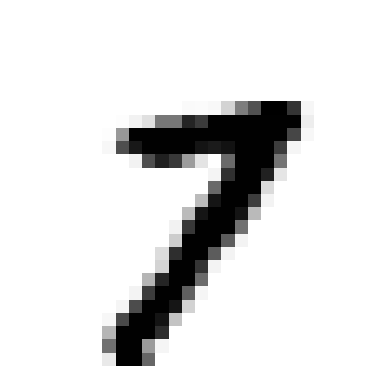

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# choose a digit from the dataset
some_digit = X[40000]
# reshape it to a 28*28 array
some_digit_image = some_digit.reshape(28, 28)
# display it using Matplotlib
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()

In [6]:
# what does label tell us?
y[40000]

'7'

In [7]:
# MNIST dataset has splitted into 
# a training set (the first 60,000 images) and a test set (the last 10,000 images)

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
# Shuffle the training set
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [9]:
# Binary Classifier: 7 and not-7
# create the target vectors for this classification task
y_train_7 = (y_train == '7') # True for all 7s, False for all other digits.
y_test_7 = (y_test == '7')

In [10]:
# Stochastic Gradient Descent(SGD) classifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_7) # Learning 

SGDClassifier(random_state=42)

In [11]:
# Classification
sgd_clf.predict([some_digit])

array([ True])

In [12]:
# Measuring accuracy with Cross-Validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_7, cv=3, scoring="accuracy")

array([0.9822 , 0.97765, 0.97885])

In [13]:
# predict with cross_val_predict
from sklearn.model_selection import cross_val_predict
y_test_pred = cross_val_predict(sgd_clf, X_test, y_test_7, cv=3)

In [14]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_mx= confusion_matrix(y_test_7, y_test_pred)
conf_mx

array([[8756,  216],
       [ 122,  906]])

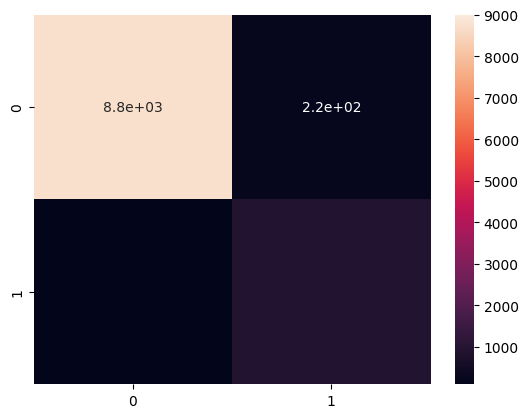

In [15]:
# heatmap
import seaborn as sns
ax = sns.heatmap(conf_mx, vmin=100, vmax=9000, annot=True)

In [16]:
#Precision
from sklearn.metrics import precision_score, recall_score
precision_score(y_test_7, y_test_pred)  # == 906 / ( 906 + 216)

0.8074866310160428

In [17]:
#Recall 
recall_score(y_test_7, y_test_pred) # == 906 / ( 906 + 122)

0.8813229571984436

In [18]:
#Decision scores for test data
y_scores = cross_val_predict(sgd_clf, X_test, y_test_7, cv=3,
method="decision_function")

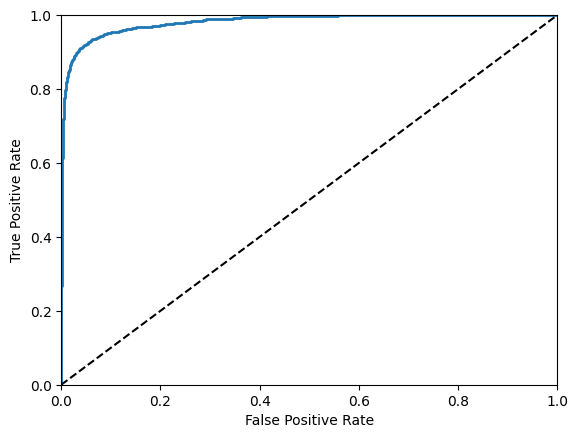

In [19]:
#Roc Curve
#False positive rate(FPR), True negative rate(TNR)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test_7, y_scores)
#Plot FPR against the TPR:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

In [20]:
# ROC AUC(the area under the curve)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_7, y_scores)

0.9822161814273893

In [21]:
#looking at the ROC curve and the ROC AUC score, you may think that
#the classifier is really good. But this is mostly because there are
#few positives (7s) compared to the negatives (non-7s). 